In [27]:
from pathlib import Path 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

In [13]:
delta_dirs = list() 
delta_dirs.append(Path(Path.home(), "Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo"))
delta_dirs.append(Path(Path.home(), "Documents/xray/dev/23_crystal_sim/data/hetero_vs_weighted_average"))
delta_dirs.append(Path(Path.home(), "Documents/xray/dev/23_crystal_sim/data/hetero_vs_flipped"))
delta_dirs.append(Path(Path.home(), "Documents/xray/dev/23_crystal_sim/data/hetero_vs_intermixed"))

all_delta_dfs = list() 
for delta_dir in delta_dirs: 
    delta_dfs = list() 
    for delta_file in delta_dir.glob("*.csv"): 
        print(delta_file)

        delta_df = pd.read_csv(delta_file, index_col=0)
        delta_dfs.append(delta_df)
    
    all_delta_dfs.append(delta_dfs)

/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_63.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_26.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_47.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_87.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_85.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_78.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_45.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_61.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_24.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_19.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/hetero_vs_psuedo/trial_65.0.csv
/Users/matthew/Documents/xray/dev/23_crystal_sim/data/

In [14]:
Ns = list() 
for col in all_delta_dfs[0][0].columns: 
    Ns.append(int(col.split("_")[2]))

Ns = list(set(Ns))
Ns = sorted(Ns)
Ns

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [15]:
for i in range(len(all_delta_dfs)): 
    delta_dfs = all_delta_dfs[i]
    delta_dfs_tmp = list() 
    for delta_df in delta_dfs: 
        delta_df_valid = True 
        for N in Ns: 
            if ("delta_real_{}".format(N) not in delta_df.columns) or ("delta_imag_{}".format(N) not in delta_df.columns): 
                delta_df_valid = False

        if delta_df_valid: 
            delta_dfs_tmp.append(delta_df)
    
    all_delta_dfs[i] = delta_dfs_tmp
    print(len(all_delta_dfs[i]))

100
100
100
100


100 10
100 10
100 10
100 10


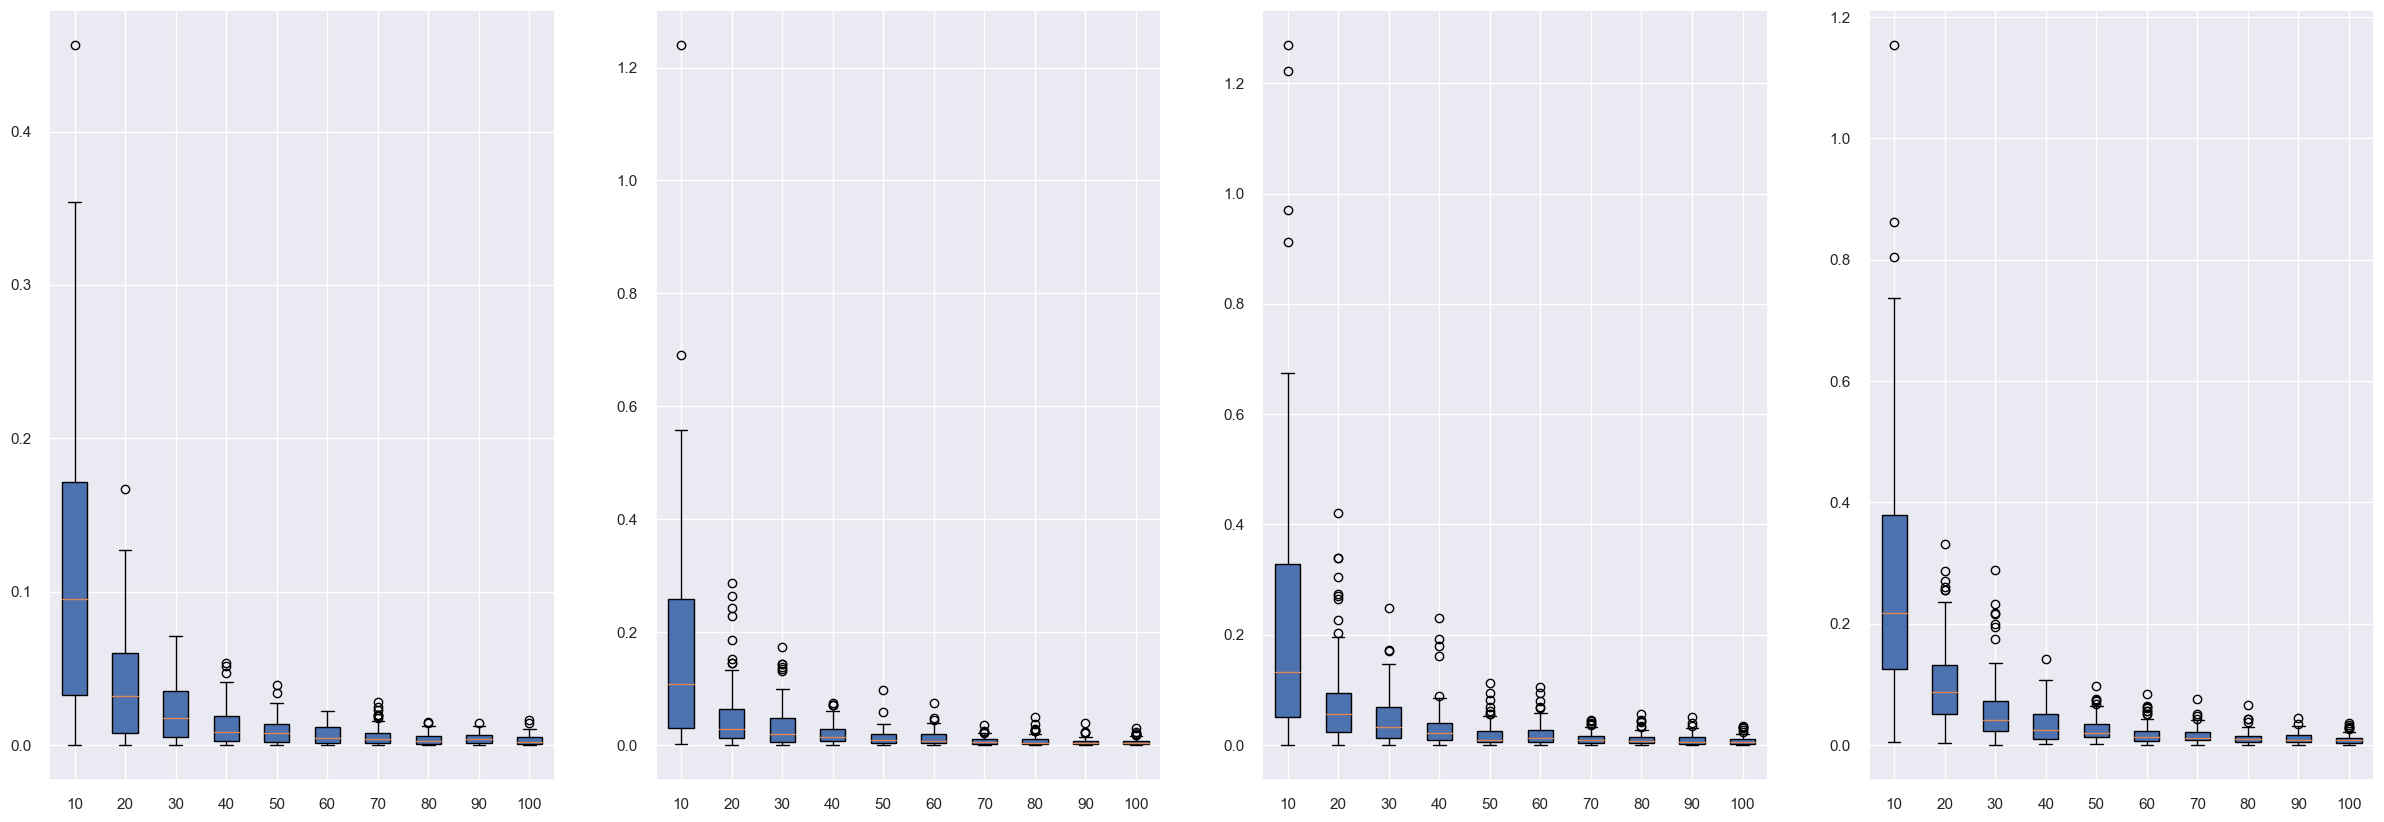

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))
 
for i in range(len(all_delta_dfs)): 
    delta_dfs = all_delta_dfs[i]

    all_delta_rmsds = list() 
    for N in Ns: 
        delta_rmsds = list() 
        for delta_df in delta_dfs:
            for hkl in delta_df.index:
                delta_real = delta_df.loc[hkl, "delta_real_{}".format(N)]
                delta_imag = delta_df.loc[hkl, "delta_imag_{}".format(N)]

            delta_rmsds.append(np.sqrt(delta_real**2 + delta_imag**2))

        all_delta_rmsds.append(delta_rmsds)

    print(len(all_delta_rmsds[i]), len(Ns))
    axs[i].boxplot(
        all_delta_rmsds,
        vert=True,  # vertical box alignment
        patch_artist=True,  # fill with color
        labels=Ns
    )  # will be used to label x-ticks

# plt.show()
plt.savefig(Path(Path.home(), "Desktop/plot_delta.png"), dpi=300)